In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('prices_round_3_day_2.csv',index_col='timestamp', sep=';')

In [3]:
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,2,ROSES,14421,27,14420.0,35.0,NaN,NaN,14422,62,NaN,NaN,NaN,NaN,14421.5,0.0
0,2,STRAWBERRIES,4036,255,NaN,NaN,NaN,NaN,4037,255,NaN,NaN,NaN,NaN,4036.5,0.0
0,2,CHOCOLATE,7888,123,NaN,NaN,NaN,NaN,7890,123,NaN,NaN,NaN,NaN,7889.0,0.0
0,2,GIFT_BASKET,70593,1,70592.0,10.0,70591.0,27.0,70604,1,70605.0,10.0,70606.0,27.0,70598.5,0.0
100,2,CHOCOLATE,7889,102,NaN,NaN,NaN,NaN,7890,48,7891.0,54.0,NaN,NaN,7889.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999800,2,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0
999900,2,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
999900,2,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0


In [4]:
df_chocolate = df.loc[df['product']=='CHOCOLATE'][['mid_price']].rename(columns={'mid_price': 'chocolate'})
df_strawberries = df.loc[df['product']=='STRAWBERRIES'][['mid_price']].rename(columns={'mid_price': 'strawberries'})
df_roses = df.loc[df['product']=='ROSES'][['mid_price']].rename(columns={'mid_price': 'roses'})
df_gift_basket = df.loc[df['product']=='GIFT_BASKET'][['mid_price']].rename(columns={'mid_price': 'gift_basket'})
df = pd.concat([df_chocolate, df_strawberries, df_roses, df_gift_basket], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price                                  
          chocolate strawberries    roses gift_basket
timestamp                                            
0            7889.0       4036.5  14421.5     70598.5
100          7889.5       4036.5  14424.0     70618.5
200          7890.5       4037.0  14422.5     70617.0
300          7890.0       4037.0  14421.5     70615.5
400          7890.0       4037.0  14422.0     70629.5
...             ...          ...      ...         ...
999500       7750.5       3983.5  14409.5     69534.5
999600       7750.5       3983.5  14408.0     69529.5
999700       7750.5       3984.5  14411.5     69543.0
999800       7750.0       3984.5  14412.5     69542.0
999900       7750.0       3984.5  14411.5     69556.0

[10000 rows x 4 columns]

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

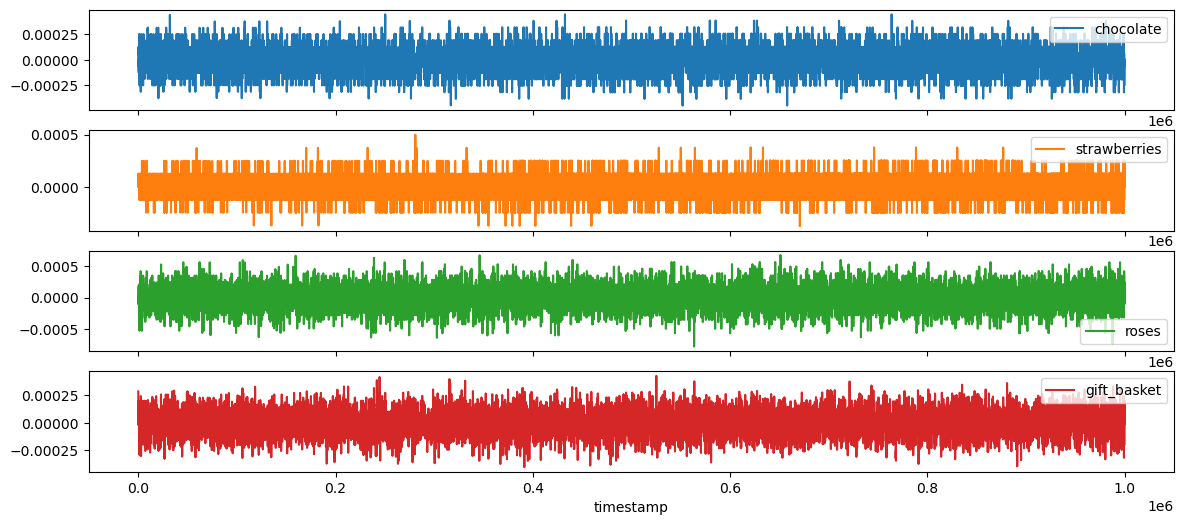

In [5]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

array([[<Axes: xlabel='chocolate', ylabel='chocolate'>,
        <Axes: xlabel='strawberries', ylabel='chocolate'>,
        <Axes: xlabel='roses', ylabel='chocolate'>,
        <Axes: xlabel='gift_basket', ylabel='chocolate'>],
       [<Axes: xlabel='chocolate', ylabel='strawberries'>,
        <Axes: xlabel='strawberries', ylabel='strawberries'>,
        <Axes: xlabel='roses', ylabel='strawberries'>,
        <Axes: xlabel='gift_basket', ylabel='strawberries'>],
       [<Axes: xlabel='chocolate', ylabel='roses'>,
        <Axes: xlabel='strawberries', ylabel='roses'>,
        <Axes: xlabel='roses', ylabel='roses'>,
        <Axes: xlabel='gift_basket', ylabel='roses'>],
       [<Axes: xlabel='chocolate', ylabel='gift_basket'>,
        <Axes: xlabel='strawberries', ylabel='gift_basket'>,
        <Axes: xlabel='roses', ylabel='gift_basket'>,
        <Axes: xlabel='gift_basket', ylabel='gift_basket'>]], dtype=object)

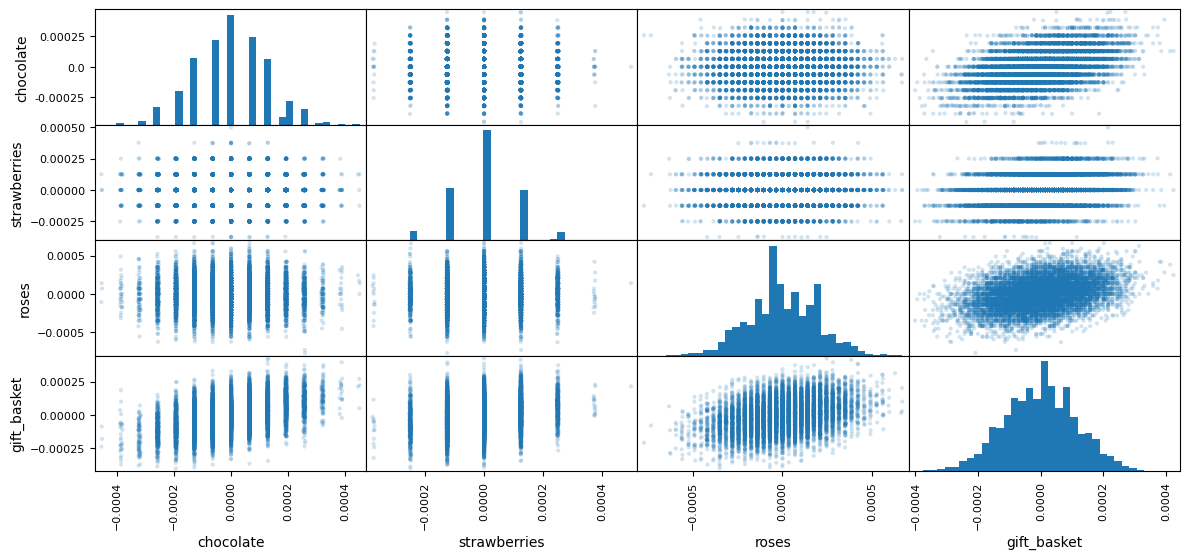

In [6]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

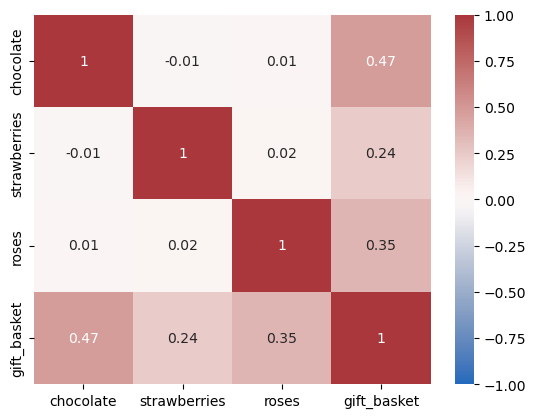

In [7]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

In [8]:
returns.corr()

,chocolate,strawberries,roses,gift_basket
chocolate,1.000000,-0.008364,0.005293,0.471674
strawberries,-0.008364,1.000000,0.021142,0.236449
roses,0.005293,0.021142,1.000000,0.345846
gift_basket,0.471674,0.236449,0.345846,1.000000
